<a href="https://colab.research.google.com/github/melisacaputo/datascience/blob/main/ProyectoFinal%2BCaputo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎶 **Características musicales y su relación con la cantidad de reproducciones** 🎶



# **Abstract**


En la era digital, la música se volvió más accesible que nunca gracias a plataformas como Spotify. Detrás de la aparente simplicidad de escuchar una canción en línea, se esconde un mundo de datos y características musicales que influyen en la cantidad de reproducciones.

El objetivo de este proyecto es elaborar un modelo de Machine Learning que permita predecir si una canción será exitosa o no a partir de un análisis detallado de sus características musicales.





---


🔊 **Pregunta objetivo**


¿Qué características debe tener una canción para ser exitosa en cuanto a su cantidad de reproducciones?

---




---


🔊 **Contexto comercial**

Con este proyecto se espera ayudar a la industria musical a tomar decisiones más informadas y precisas en cuanto a la producción y promoción de nuevos lanzamientos, lo que en última instancia beneficiará a plataformas de streaming, discograficas, artistas y oyentes.


---





---


🔊 **Problema comercial**

Se plantean algunas preguntas base para llevar a cabo el análisis:

* ¿Cómo se distribuye la cantidad de streams en Spotify? ¿Cuántas reproducciones diarias suelen tener las canciones más exitosas?
* ¿Se pueden identificar relaciones de dependencia entre las distintas características musicales?
* ¿Quiénes son los artistas que tienen mayor popularidad en la plataforma?
* ¿Cómo influye el género musical en la cantidad de reproducciones? ¿Existen géneros que tienden a ser más populares que otros?
* ¿Cuál es el impacto de la duración de una canción en su éxito en Spotify? Son más exitosas las canciones más cortas?
* ¿Existen patrones en la popularidad de las canciones lanzadas en días específicos de la semana o en ciertos meses del año?


---





---


🔊 **Contexto análitico**

La plataforma Spotify nos proporciona un dataset que contiene información muy útil para nuestro proyecto.

El dataset original contaba con una cantidad muy numerosa de registros ya que contenia el ranking diario de Spotify de los años 2017 y 2018 para cada región del mundo. Para simplificar el análisis y optimizar el rendimiento de memoria, se trabajará con un nuevo dataset filtrado por la región estadounidense como muestra de la población total.

Se cuenta con 22 columnas, que incluyen variables como la posición en las listas, el nombre de la canción, el artista, la cantidad de streams y el día del ranking. Además, se dispone de datos sobre características musicales como danzabilidad, energía, tonalidad, entre otras.

Se parte de la hipótesis de que existen características musicales específicas que tienen una influencia significativa en el éxito en streaming de las canciones. Se espera que variables como la danzabilidad, energía y valencia tengan una correlación positiva con la cantidad de streams.

Se emplearán herramientas y algoritmos de aprendizaje automático para desarrollar modelos que busquen predecir el éxito de una canción en función de sus características musicales. Además, se crearán visualizaciones y se usarán técnicas de análisis exploratorio de datos para comprender mejor la relación entre las variables.

---



# **Exploratory Data Analysis & Data Wrangling**

📚 Librerías:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

📊 Estilo de los gráficos:

In [ ]:
mpl.style.use('seaborn')
mpl.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#00bb2d'])
sns.set_style(rc={"axes.labelsize": "10"})

📂 Importación del dataset:

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRSbxW53joz0J2_sB9wz_k-QgZT9aPSvET2DXjb8ILMMSJVEAMyaTE-BKRZW96GRHNmWrn_JyAn-n0q/pub?gid=1509851203&single=true&output=csv")

In [ ]:
df.head()

,position,track_name,artist,streams,url,year,month,day,region,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2017,1,1,us,927.0,...,-5.313,1,244.00,61.0,0.0,123.0,175.0,127.076,343150,4
1,2,Fake Love,Drake,1180074,https://open.spotify.com/track/343YBumqHu19cGo...,2017,1,1,us,927.0,...,-9.433,0,0.42,108.0,0.0,196.0,605.0,133.987,210937,4
2,3,Starboy,The Weeknd,1064351,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017,1,1,us,681.0,...,-7.028,1,282.00,165.0,3.49e-06,134.0,535.0,186.054,230453,4
3,4,Closer,The Chainsmokers,1010492,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017,1,1,us,748.0,...,-5.599,1,338.00,414.0,0.0,111.0,661.0,95.010,244960,4
4,5,Black Beatles,Rae Sremmurd,874289,https://open.spotify.com/track/6fujklziTHa8uoM...,2017,1,1,us,794.0,...,-6.163,1,649.00,142.0,0.0,128.0,355.0,145.926,291893,4


📑 Diccionario de variables:

In [ ]:
df.columns

Index(['position', 'track_name', 'artist', 'streams', 'url', 'year', 'month',
       'day', 'region', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

* **position** - posición en el ranking en ese día.
* **streams** - número de reproducciones en ese día.
* **year** - año del ranking.
* **month** - mes del ranking.
* **day** - día del ranking.
* **danceability** - que tan bailable es una canción (0.0 - 1.0).
* **energy** - medida de intensidad y actividad. Las canciones energéticas son rápidas y ruidosas (por ejemplo Death Metal), mientras que un preludio de Bach tendría una intensidad baja.
* **key** - clave de la canción. Los valores que toma son Do (0), Do#/♭ (1), Re (2) ... hasta Si(11). Si no se pudo detectar, el valor es -1.
* **loudness** - media del ruido de una canción (en dB).
* **mode** - modalidad de la canción - Menor (0) o Mayor (1).
* **speechiness** - presencia de palabras habladas en la pista de audio. Por encima de 0.66 son audios donde hay casi exclusivamente voz. Entre 0.66 y 0.33 entran canciones que combinan tanto música como voz (por ejemplo, el rap). Por debajo de 0.33 estaría la música y otros audios sin voz.
* **acousticness** - confianza de que una canción sea más o menos acústica (vs digital).
* **instrumentalness** - si una canción contiene o no instrumentos.
* **liveness** - si una canción se ha grabado "en vivo" o no, por encima de 0.8 es muy probable que sea en vivo.
* **valence** - positivismo de una canción. Cuando el valor es cercano a 1.0 la canción es más alegre, mientras que las canciones con valencia baja tienden a ser más tristes.
* **tempo** - el tempo medio estimado en "beats per minute" (BPM), es sinónimo de la velocidad de una canción.
* **duration_ms** - duración total del track.
* **time_signature** - compás medio del track, mide las pulsaciones que hay por cada compás.


In [ ]:
df.drop("url", axis=1, inplace=True)
df.drop("region", axis=1, inplace=True)

Se elimina la variable 'url' por no tener relevancia para nuestro análisis y la variable 'region' ya que previamente se filtró por una sola región para achicar el volumen del dataset.


🔍 Compruebo que los tipos de datos sean correctos:

In [ ]:
df.dtypes

position              int64
track_name           object
artist               object
streams               int64
year                  int64
month                 int64
day                   int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness     object
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

🛠️ Corrijo los tipos de datos de acuerdo a la descripción de las variables:

In [ ]:
df["track_name"] = df["track_name"].astype("category")
df["artist"] = df["artist"].astype("category")
df['instrumentalness'] = df['instrumentalness'].str.replace(',', '.').apply(lambda x: float(x))

In [ ]:
df.dtypes

position               int64
track_name          category
artist              category
streams                int64
year                   int64
month                  int64
day                    int64
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms            int64
time_signature         int64
dtype: object

🔍 Compruebo la cantidad de nulos por columna:

In [ ]:
df.isna().sum()

position            0
track_name          8
artist              8
streams             0
year                0
month               0
day                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

Se encuentra que solo las columnas 'track_name' y 'artist' tienen datos faltantes, con una cantidad de 8 datos faltantes cada una. Dado el volúmen del dataset y que son variables difíciles de reemplazar por ser categóricas, lo mejor es eliminar las filas por completo.

In [ ]:
df.dropna(inplace=True)
df.shape

(72692, 20)

🔍 Compruebo si existe algún duplicado en el dataset:

In [ ]:
df.duplicated().any()

False

📈 Análisis de cardinalidad:

In [ ]:
variables_categoricas = df.select_dtypes(include=['category'])
cardinalidad = pd.DataFrame({'Cantidad': variables_categoricas.nunique(), 'Porcentaje': (variables_categoricas.nunique()) / (variables_categoricas.shape[0]) * (100)})
cardinalidad

,Cantidad,Porcentaje
track_name,1853,2.549111
artist,404,0.555770


La cardinalidad de los datos parece ser correcta basándonos en la descripción de las variables. Es común que haya una variedad grande de nombres de canciones en el dataset, sin embargo la cardinalidad se mantiene baja porque una canción puede estar varios días en el ranking. Por otro lado, contamos con 404 artistas diferentes en el dataset.

📋 Análisis estadístico - variables numéricas:

In [ ]:
df.describe().round(2)

,position,streams,year,month,day,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,72692.00,72692.00,72692.0,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00
mean,50.50,552589.22,2017.5,6.53,15.70,633.57,547.70,5.28,-6.63,0.60,379.91,358.68,49.78,313.36,421.97,122.63,211432.17,3.98
std,28.87,346044.27,0.5,3.45,8.77,262.99,225.56,3.76,12.55,0.49,244.74,252.95,157.40,302.68,239.89,28.87,44886.39,0.19
min,1.00,192102.00,2017.0,1.00,1.00,0.24,0.18,0.00,-898.00,0.00,0.03,0.00,0.00,0.08,0.04,46.72,31200.00,1.00
25%,26.00,337790.00,2017.0,4.00,8.00,587.00,454.00,1.00,-7.62,0.00,191.00,161.00,0.00,112.00,257.00,98.96,186293.00,4.00
50%,51.00,447471.00,2018.0,7.00,16.00,712.00,585.00,5.00,-6.31,1.00,351.00,282.00,0.00,162.00,419.00,124.00,210376.00,4.00
75%,76.00,640133.00,2018.0,10.00,23.00,797.00,711.00,8.00,-5.02,1.00,532.00,544.00,0.00,407.00,591.00,142.93,233705.00,4.00
max,100.00,5749019.00,2018.0,12.00,31.00,972.00,982.00,11.00,175.00,1.00,999.00,996.00,993.00,999.00,998.00,232.69,728413.00,5.00


📋 Análisis estadístico - variables categóricas:

In [ ]:
df.describe(include="category")

,track_name,artist
count,72692,72692
unique,1853,404
top,XO TOUR Llif3,Post Malone
freq,607,3858


#### 💡 Enriquecimiento del dataset mediante API

Una de las variables más importantes a la hora de analizar el éxito de una canción es su género musical, variable que no se encuentra disponible en el dataset original pero si lo está en la API oficial de Spotify.

Para poder consumir datos desde la API de Spotify, cree una aplicación vinculada con mi cuenta en la plataforma y usare la librería spotipy para facilitar la interacción y autenticación con mis credenciales.

In [ ]:
pip install spotipy

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from google.colab import userdata

client_id = '1ad7b6cbca594481aa3fd170116a9bcc'
client_secret = userdata.get('spotify_secret')

credentials = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=credentials)

In [ ]:
def get_genre(artist_name):
    try:
        results = sp.search(q=f'artist:{artist_name}', type='artist')
        artist = results['artists']['items'][0]

        if artist['genres']:
            return artist['genres'][0]
        else:
            return None
    except Exception as e:
        return None

In [ ]:
df['genre'] = df['artist'].apply(get_genre)

In [ ]:
df["genre"] = df["genre"].astype("category")

In [ ]:
df.head()

,position,track_name,artist,streams,year,month,day,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,2017,1,1,927.0,665.0,11,...,1,244.00,61.0,0.000000,123.0,175.0,127.076,343150,4,atl hip hop
1,2,Fake Love,Drake,1180074,2017,1,1,927.0,488.0,9,...,0,0.42,108.0,0.000000,196.0,605.0,133.987,210937,4,canadian hip hop
2,3,Starboy,The Weeknd,1064351,2017,1,1,681.0,594.0,7,...,1,282.00,165.0,0.000003,134.0,535.0,186.054,230453,4,canadian contemporary r&b
3,4,Closer,The Chainsmokers,1010492,2017,1,1,748.0,524.0,8,...,1,338.00,414.0,0.000000,111.0,661.0,95.010,244960,4,pop
4,5,Black Beatles,Rae Sremmurd,874289,2017,1,1,794.0,632.0,0,...,1,649.00,142.0,0.000000,128.0,355.0,145.926,291893,4,melodic rap


#### 📊 Distribución de la variable objetivo

In [ ]:
df['streams'].describe().round(0)

count      72692.0
mean      552589.0
std       346044.0
min       192102.0
25%       337790.0
50%       447471.0
75%       640133.0
max      5749019.0
Name: streams, dtype: float64

In [ ]:
stats.describe(df.streams)

DescribeResult(nobs=72692, minmax=(192102, 5749019), mean=552589.2183871678, variance=119746635734.18922, skewness=3.2854682948913654, kurtosis=18.86317652020229)

A simple vista, los resultados estadísticos indican que la distribución de la variable streams es asimétrica hacia la derecha, con una gram concentración de datos alrededor de la media y valores extremos que contribuyen a la asimetría y la curtosis. La varianza es considerable, lo que indica una dispersión significativa de las cantidades de reproducciones.






In [ ]:
stats.variation(df.streams)*100

62.62190370874458

El valor del coeficiente de variación es mayor a 30% lo que nos indica que los datos son heterogéneos, es decir que la media no es una buena representación para este conjunto y que debemos tener cuidado al seleccionar muestras aleatorias de la población.

In [ ]:
total_canciones = df.shape[0]
canciones_millon = df[df['streams'] > 1000000]
cantidad_canciones = canciones_millon.shape[0]
porcentaje_canciones_millon = (cantidad_canciones / total_canciones) * 100
print(f"El {porcentaje_canciones_millon:.2f}% de las canciones superan el millón de reproducciones diarias.")

El 8.23% de las canciones superan el millón de reproducciones diarias.


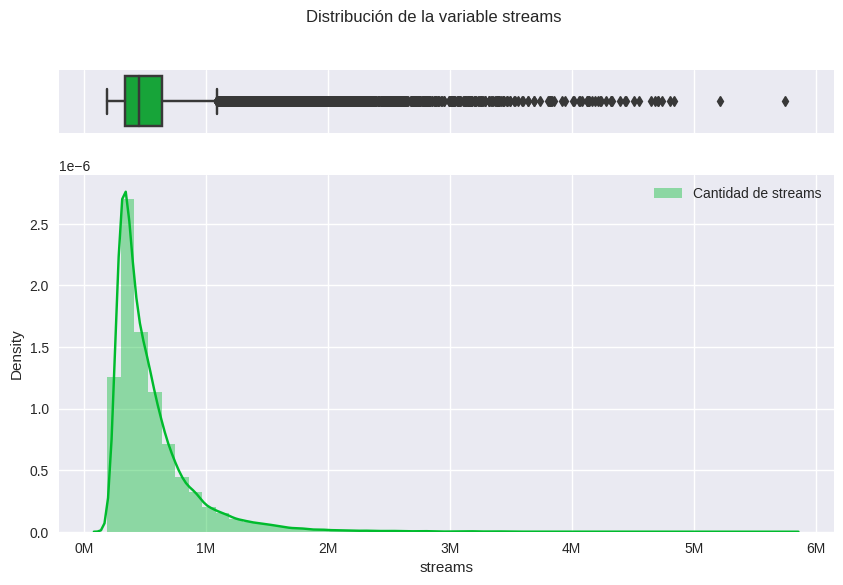

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df['streams'], ax=ax_box, orient="h")
sns.distplot(df['streams'], ax=ax_hist, label='Cantidad de streams')
ax_hist.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x * 1e-6)))
ax_box.set(yticks=[])
ax_hist.legend()
plt.suptitle('Distribución de la variable streams')
plt.show()

Al analizar la distribución de la variable de forma gráfica, se observa que la mayoría de las canciones tienen una cantidad de streams por debajo de los 2M. Esto se refleja en el histograma asimétrico a la derecha, donde se ve una concentración de canciones en el rango más bajo de streams. Sin embargo, el boxplot revela una presencia significativa de valores atípicos por encima de los 2M streams. Estos puntos negros representan un número considerable de canciones con un alto número de streams, incluso superando los 5M.

Este contraste entre la mayoría de canciones con un bajo número de streams y la presencia de un grupo notable de canciones con un alto número de streams puede deberse a diferentes factores como éxitos internacionales, temas virales o lanzamientos de artistas populares.

In [ ]:
median = np.median(df.streams)
mad = np.median(np.abs(df.streams - median))
threshold = 3.5
outliers = df.streams[np.abs(df.streams- median) / mad > threshold]
print("Outliers detectados por el Método de las Desviaciones Absolutas Medianas (MAD):")
print(outliers)

Outliers detectados por el Método de las Desviaciones Absolutas Medianas (MAD):
0        1371493
1        1180074
2        1064351
3        1010492
100      1161746
          ...   
72604    1341344
72605    1200764
72606    1178128
72607    1134708
72608    1096165
Name: streams, Length: 8009, dtype: int64


Usando el umbral máximo para la detección se encontraron 8009 de outliers en el dataset, número considerable pero a la vez razonable teniendo en cuenta el tamaño de la población.

Si acotamos la interpretación de outliers a partir de lo observado en el boxplot, vemos dos registros que son significativamente atípicos:

In [ ]:
outliers = df[df['streams'] > 5000000]
columnas_interes = ['streams', 'day', 'month', 'year', 'track_name', 'artist']
tabla = outliers[columnas_interes]
print(tabla.reset_index(drop=True))

   streams  day  month  year track_name artist
0  5749019   29      6  2018    Nonstop  Drake
1  5219711   29      6  2018   Survival  Drake


Investigando más detalladamente estos registros, se encontró que ambos coinciden con la fecha de lanzamiento del álbum 'Scorpion' del rapero candiense Drake, su álbum más exitoso hasta el momento.

Se llega a la conclusión de que lo mejor es conservar todos los valores del modelo, ya que la fuente es confiable y se comprobó en los valores más extremos que no se trata de errores sino de canciones realmente exitosas.

#### 💿 Características musicales


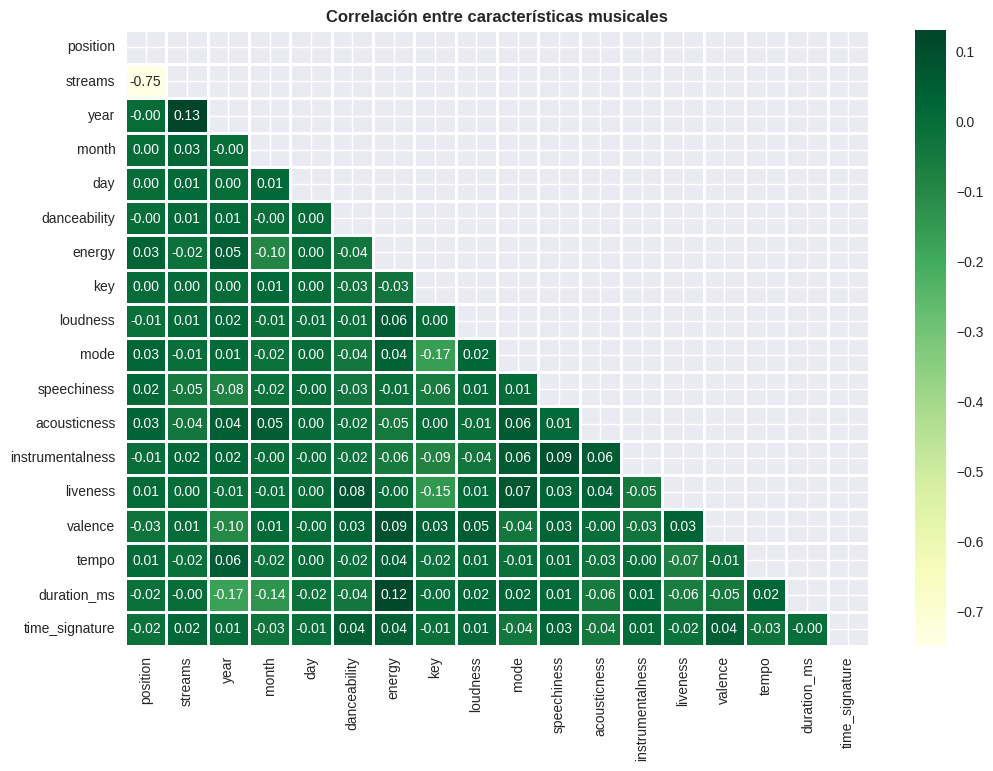

In [ ]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
sns.heatmap(df.corr(), mask=mask, lw=1, annot=True, cmap="YlGn", fmt=".2f")
plt.title('Correlación entre características musicales')
plt.show()

En la matriz de correlaciones de nuestro dataset podemos ver que no existen correlaciones lineales ***fuertes*** entre las variables y tampoco al compararlas con la cantidad de streams, salvo por la posición del ranking, cosa que tiene sentido ya que es una variable que depende directamente de la cantidad de reproducciones.
A continuación se realizará un análisis más detallado con foco en las correlaciones significativas ***debiles***, tomando como referencia las que se encuentran por encima de un valor absoluto de 0.1.

* mode vs. key

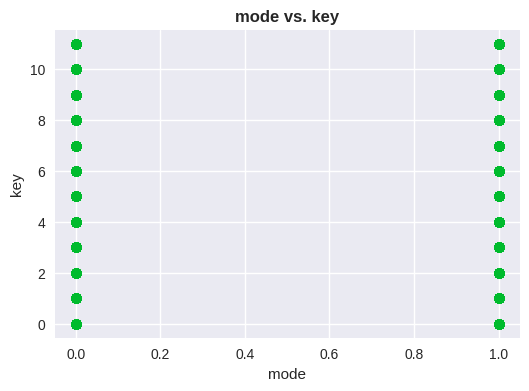

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df['mode'], df['key'], alpha = 0.5)

ax.set_title('mode vs. key')
ax.set_xlabel('mode')
ax.set_ylabel('key')

plt.show()

In [ ]:
correlation, p_value = stats.spearmanr(df['mode'], df['key'])
print("Correlación de Spearman:", correlation)
print("Valor p:", p_value)

Correlación de Spearman: -0.1536977521589516
Valor p: 0.0


Se seleccionó la correlación de Spearman por tratarse de dos variables ordinales. La correlación negativa indica que hay una tendencia de que a medida que un valor de la variable 'mode' aumenta, el valor de la variable 'key' tiende a disminuir, y viceversa. Sin embargo, la magnitud de la correlación es débil (cerca de cero), lo que sugiere que la relación no es muy fuerte.

Por otro lado, tomando un nivel de significancia de 0.05, el valor p de 0.0 indica que la correlación observada es muy poco probable que haya ocurrido por azar. Esto refuerza la idea de que hay alguna relación significativa entre las variables. Sin embargo, al ser una correlación débil, otros factores podrían estar influyendo en la relación entre 'mode' y 'key'.

* liveness vs. key

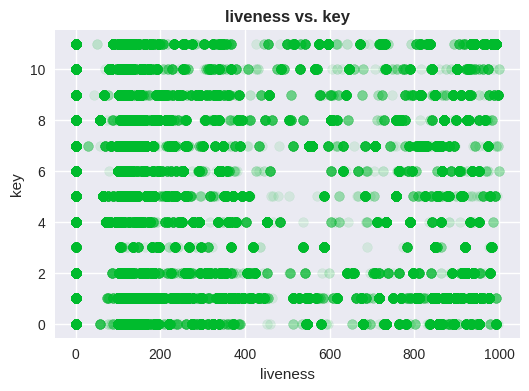

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df['liveness'], df['key'], alpha = 0.1)

ax.set_title('liveness vs. key')
ax.set_xlabel('liveness')
ax.set_ylabel('key')

plt.show()

In [ ]:
correlation, p_value = stats.pearsonr(df['liveness'], df['key'])
print("Correlación de Pearson:", correlation)
print("Valor p:", p_value)

Correlación de Pearson: -0.14807540191540447
Valor p: 0.0


Estos resultados indican que hay una tendencia a que las canciones con mayor valor en 'liveness' tengan una tonalidad (key) diferente, y esta relación es estadísticamente significativa. Sin embargo, como en el caso anterior, la magnitud de la correlación es moderada, lo que significa que hay múltiples factores que influyen en la elección de la tonalidad de una canción además de su nivel de "liveness".

* duration_ms vs. energy

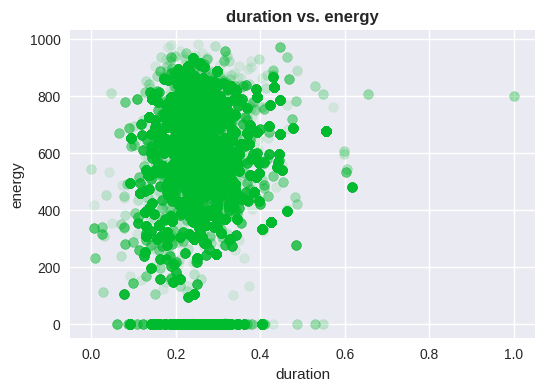

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_duration = scaler.fit_transform(df[['duration_ms']])

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(scaled_duration, df['energy'], alpha=0.1)

ax.set_title('duration vs. energy')
ax.set_xlabel('duration')
ax.set_ylabel('energy')

plt.show()

In [ ]:
correlation, p_value = stats.pearsonr(df['duration_ms'], df['energy'])
print("Correlación de Pearson:", correlation)
print("Valor p:", p_value)

Correlación de Pearson: 0.11732297162789579
Valor p: 4.2126279984090094e-221


La correlación de Pearson entre las variables 'duration_ms' y 'energy' es 0.117, lo que indica una correlación positiva débil entre estas dos variables. Cuando la duración de una canción aumenta, la energía tiende a aumentar ligeramente, y viceversa.

El valor p asociado a esta correlación es extremadamente pequeño, lo que sugiere que la probabilidad de que esta correlación sea el resultado del azar es prácticamente nula.


#### 🎤 Artistas populares

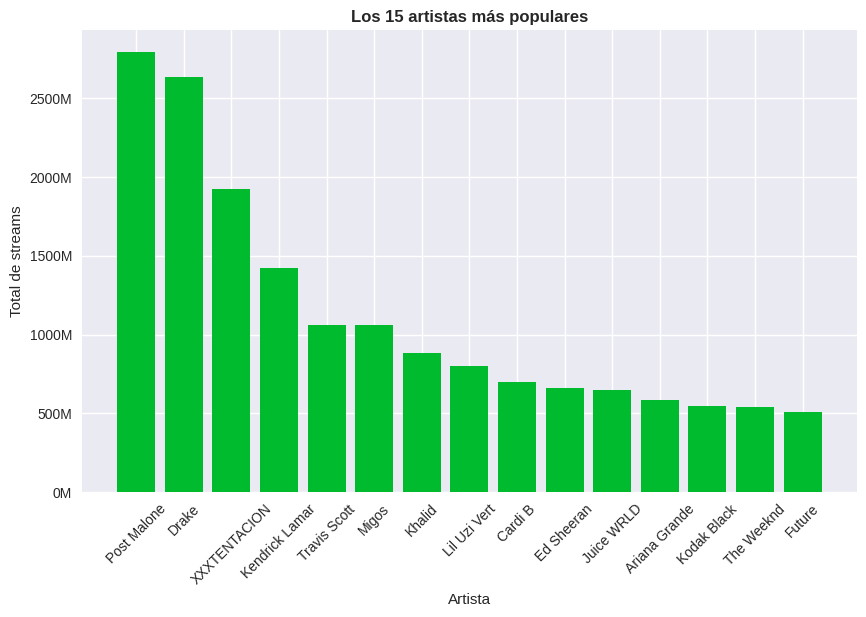

In [ ]:
popularidad_artista = df.groupby('artist')['streams'].sum().reset_index()
top_artistas = popularidad_artista.sort_values(by='streams', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.bar(top_artistas['artist'], top_artistas['streams'])
plt.xlabel('Artista')
plt.ylabel('Total de streams')
plt.title('Los 15 artistas más populares')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6)))
plt.show()

A partir del gráfico podemos observar que ciertos artistas tienen una presencia dominante en términos de popularidad, ya que su número total de streams es significativamente mayor que el de otros artistas.

Con un poco de conocimiento en el negocio, podemos inferir que la mayoría de artistas ubicados en el top 15 pertenecen al género Hip Hop / Rap, por lo que si varios de estos artistas pertenecen a la misma discográfica o tienen conexiones cercanas, podría haber oportunidades de colaboración entre ellos para aumentar el éxito de sus canciones.

#### 🎧 Géneros populares

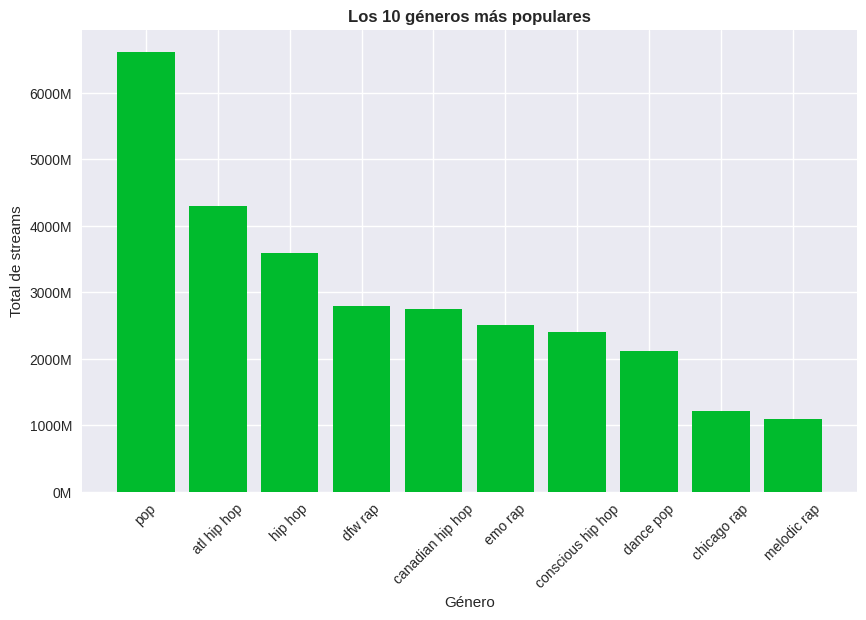

In [ ]:
popularidad_genero = df.groupby('genre')['streams'].sum().reset_index()
top_generos = popularidad_genero.sort_values(by='streams', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_generos['genre'], top_generos['streams'])
plt.xlabel('Género')
plt.ylabel('Total de streams')
plt.title('Los 10 géneros más populares')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6)))
plt.show()

Tal como inferimos a partir de los artistas más populares, vemos que las diferentes variantes de Hip Hop y Rap se encuentran entre los géneros más populares. Además, vemos una presencia significativa del pop, lo que hace sentido debido a que el nombre del género es una abreviación de la palabra "popular".


#### ⌛ Duración de las canciones

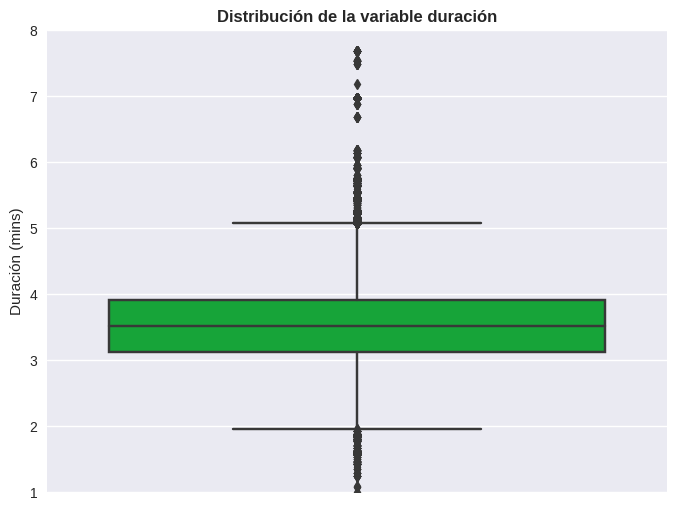

In [ ]:
df['duration_min'] = df['duration_ms'] / 60000

duration_range = (1, 8)
df_filtered = df[(df['duration_min'] >= duration_range[0]) & (df['duration_min'] <= duration_range[1])]

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, y='duration_min',  color='#00bb2d')

plt.ylim(duration_range[0], duration_range[1])

plt.title('Distribución de la variable duración')
plt.ylabel('Duración (mins)')

plt.show()

El gráfico muestra la distribución de la duración de canciones en minutos, limitada a un rango de 1 a 8 minutos para facilitar el análisis.

Podemos observar que la mayoria de las canciones tienen una duración de entre 3 a 4 minutos.

Text(0, 0.5, 'Reproducciones (M)')

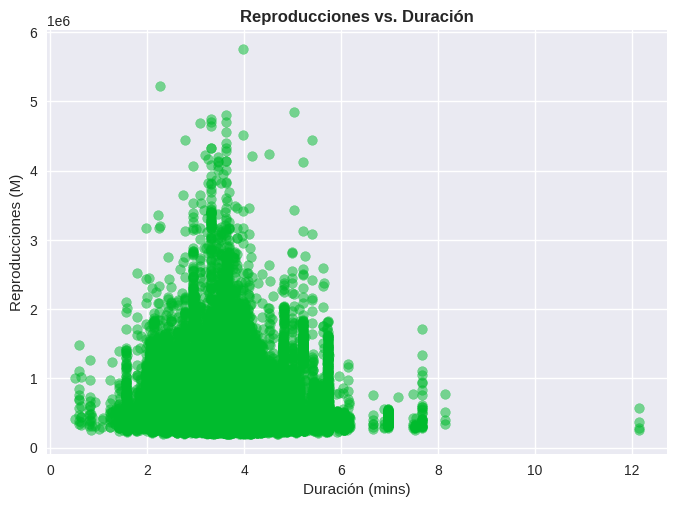

In [ ]:
duration = df['duration_min'].values.flatten()

fig, ax = plt.subplots()
ax.scatter(duration, df['streams'], alpha = 0.5)

ax.set_title('Reproducciones vs. Duración')
ax.set_xlabel('Duración (mins)')
ax.set_ylabel('Reproducciones (M)')

Podemos comprobar que las canciones con una duración promedio tienen más posibilidades de ser exitosas, mientras que las canciones con corta o larga duración no consiguen más de 2M reproducciones.

#### 🗓️ Streamings por mes


In [ ]:
df['year'].unique()

array([2017, 2018])

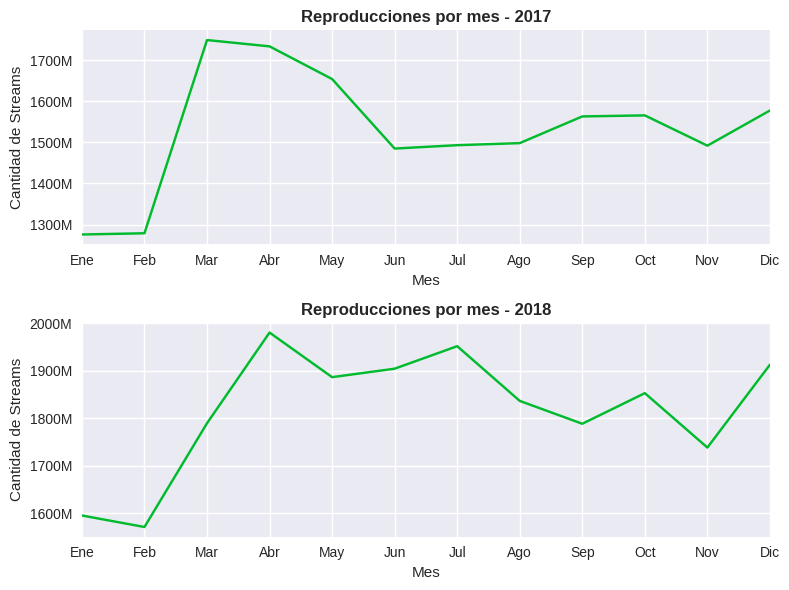

In [ ]:
streams_mensuales = df.groupby(['year', 'month'])['streams'].sum().reset_index()
years = [2017, 2018]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

for i, year in enumerate(years):
    data = streams_mensuales[streams_mensuales['year'] == year]
    axes[i].plot(data['month'], data['streams'])
    axes[i].set_title(f'Reproducciones por mes - {year}')
    axes[i].set_xlabel('Mes')
    axes[i].set_ylabel('Cantidad de Streams')
    axes[i].set_xlim(1, 12)
    axes[i].set_xticks(np.arange(1, 13, 1))
    axes[i].set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    axes[i].yaxis.set_major_locator(ticker.MultipleLocator(100000000))
    axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x * 1e-6)))  # formato de millones para el eje y

plt.tight_layout()
plt.show()

En general, se observa que la cantidad de streams en el año 2018 fue mayor en comparación con el año 2017. Esta diferencia se destaca desde el inicio, ya que la escala del eje y para el año 2018 comienza en 1600M, casi alcanzando el valor máximo de streams del año 2017.

Sin embargo, ambos años muestran un patrón similar en la evolución de la cantidad de streams durante los primeros meses del año, por lo que lo más útil para nuestro análisis sería enfocarnos en estos meses. Los primeros dos meses tienen la menor cantidad de streams, lo que podría deberse a las tendencias de consumo durante las vacaciones o días festivos. Luego, se observa un aumento exponencial en ambos años, alcanzando su punto máximo en marzo para el año 2017 y en abril para el año 2018.



#### 🗓️ Streamings por día de la semana


Text(0, 0.5, 'Cantidad de Streams')

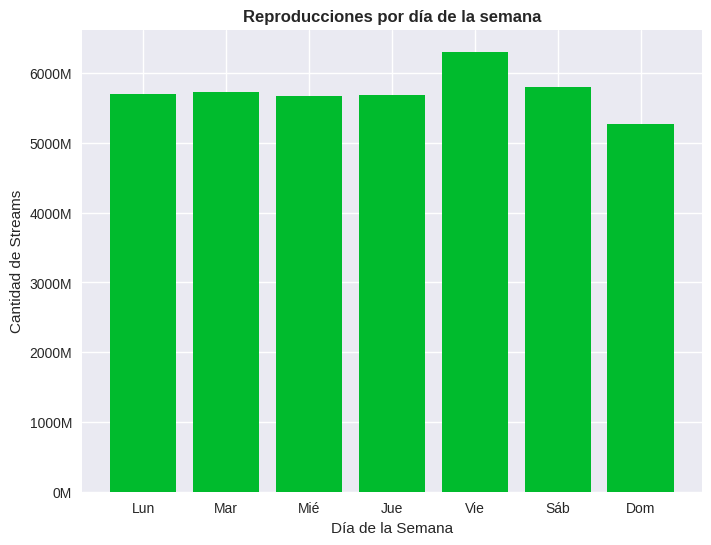

In [ ]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str))
df['day_of_week'] = df['date'].dt.dayofweek
streams_diarios = df.groupby('day_of_week')['streams'].sum().reset_index()
dias_semana = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']

plt.figure(figsize=(8, 6))
plt.bar(streams_diarios['day_of_week'], streams_diarios['streams'])
plt.xticks(streams_diarios['day_of_week'], dias_semana)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x * 1e-6)))

plt.title('Reproducciones por día de la semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Streams')

A partir del gráfico podemos inferir que los viernes son los mejores días para lanzar nuevas canciones, ya que la cantidad de streams es la más alta. El resto de los días tiene una distribución equitativa de streams, salvo por los domingos que parece ser el día de menor actividad.

# **Entrenamiento y selección de modelos**

## **Modelos de regresión**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
import pickle

⚙️ Preparación de los datos para entrenar los modelos:

In [ ]:
df.columns

Index(['position', 'track_name', 'artist', 'streams', 'year', 'month', 'day',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre', 'duration_min', 'date',
       'day_of_week'],
      dtype='object')

In [ ]:
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]
y = df['streams']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 📐 Regresión lineal múltiple

🤖 Creo y entreno al modelo optimizando sus hiperparámetros:



In [ ]:
lr = Pipeline([
    ('scaler', StandardScaler()),
    ('features', PolynomialFeatures()),
    ('regression', LinearRegression())
])

params_lr = {
    'features__degree': [1, 2, 3, 4],
    'regression__fit_intercept': [True, False],
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_lr = GridSearchCV(lr, params_lr, refit=True, cv=kfold, scoring='neg_root_mean_squared_error')
grid_search_lr.fit(X_train, y_train)

print("Mejores parámetros:", grid_search_lr.best_params_)
print("Rendimiento en conjunto de prueba:", grid_search_lr.score(X_test, y_test))

Mejores parámetros: {'features__degree': 3, 'regression__fit_intercept': False}
Rendimiento en conjunto de prueba: -315957.639931036


Como el grado 3 fue el mejor polinomio, no hace sentido seguir probando la búsqueda en grilla con valores mayores.

💾 Guardar el modelo:

In [ ]:
with open('LinearRegression.pkl', 'wb') as file:
    pickle.dump(grid_search_lr, file)

💾 Cargar modelo guardado:

In [ ]:
with open('/content/LinearRegression.pkl', 'rb') as file:
    grid_search_lr = pickle.load(file)

🧠 Predicciones en el conjunto de entrenamiento:

In [ ]:
y_train_pred = grid_search_lr.predict(X_train)

🔬 Métricas de evaluación:

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Mean absolute percentage error (MAPE):', metrics.mean_absolute_percentage_error(y_train, y_train_pred))
print('R²:', r2_score(y_train, y_train_pred))

Mean Absolute Error (MAE): 204294.17773186558
Mean Squared Error (MSE): 94530616819.1284
Root Mean Squared Error (RMSE): 307458.3172059725
Mean absolute percentage error (MAPE): 0.4020913282337289
R²: 0.2024852761134457


In [ ]:
r2_estandar = r2_score(y_train, y_train_pred)

n_observaciones = X_test.shape[0]
n_predictores = X_test.shape[1]

r2_ajustado = 1 - ((1 - r2_estandar) * (n_observaciones - 1) / (n_observaciones - n_predictores - 1))
print("R² ajustado:", r2_ajustado)

R² ajustado: 0.202046176471939


🧠 Predicciones en el conjunto de prueba:

In [ ]:
y_test_pred = grid_search_lr.predict(X_test)

🔬 Métricas de evaluación:

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('R²:', r2_score(y_test, y_test_pred))

Mean Absolute Error (MAE): 206433.96632254325
Mean Squared Error (MSE): 99829230230.79019
Root Mean Squared Error (RMSE): 315957.639931036
Mean absolute percentage error (MAPE): 0.4085150465878308
R²: 0.18556911980023894


In [ ]:
r2_estandar = r2_score(y_test, y_test_pred)

n_observaciones = X_test.shape[0]
n_predictores = X_test.shape[1]

r2_ajustado = 1 - ((1 - r2_estandar) * (n_observaciones - 1) / (n_observaciones - n_predictores - 1))
print("R² ajustado:", r2_ajustado)

R² ajustado: 0.18512070637686673


### 🌳 Random Forest

🤖 Creo y entreno al modelo optimizando sus hiperparámetros:

In [ ]:
rf = RandomForestRegressor()

params_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_rf = GridSearchCV(rf, params_rf, cv=kfold, scoring='neg_root_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

print("Mejores parámetros:", grid_search_rf.best_params_)
print("Rendimiento en conjunto de prueba:", grid_search_rf.score(X_test, y_test))

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Rendimiento en conjunto de prueba: -256298.81579001492


💾 Guardar el modelo:

In [ ]:
with open('RandomForestRegressor.pkl', 'wb') as file:
    pickle.dump(grid_search_rf, file)

💾 Cargar modelo guardado:

In [ ]:
with open('/content/RandomForestRegressor.pkl', 'rb') as file:
    grid_search_rf = pickle.load(file)

🧠 Predicciones en el conjunto de entrenamiento:


In [ ]:
y_train_pred = grid_search_rf.predict(X_train)

🔬 Métricas de evaluación:

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Mean absolute percentage error (MAPE):', metrics.mean_absolute_percentage_error(y_train, y_train_pred))
print('R²:', r2_score(y_train, y_train_pred))

Mean Absolute Error (MAE): 155186.473079787
Mean Squared Error (MSE): 61731884103.42428
Root Mean Squared Error (RMSE): 248459.01896172794
Mean absolute percentage error (MAPE): 0.28816906680600674
R²: 0.47919427416899074


In [ ]:
r2_estandar = r2_score(y_train, y_train_pred)

n_observaciones = X_test.shape[0]
n_predictores = X_test.shape[1]

r2_ajustado = 1 - ((1 - r2_estandar) * (n_observaciones - 1) / (n_observaciones - n_predictores - 1))
print("R² ajustado:", r2_ajustado)

R² ajustado: 0.47890752635022626


🧠 Predicciones en el conjunto de prueba:

In [ ]:
y_test_pred = grid_search_rf.predict(X_test)

🔬 Métricas de evaluación:

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('R²:', r2_score(y_test, y_test_pred))

Mean Absolute Error (MAE): 157946.79869847518
Mean Squared Error (MSE): 65689082975.364
Root Mean Squared Error (RMSE): 256298.81579001492
Mean absolute percentage error (MAPE): 0.2955661223753394
R²: 0.46409265559337


In [ ]:
r2_estandar = r2_score(y_test, y_test_pred)

n_observaciones = X_test.shape[0]
n_predictores = X_test.shape[1]

r2_ajustado = 1 - ((1 - r2_estandar) * (n_observaciones - 1) / (n_observaciones - n_predictores - 1))
print("R² ajustado:", r2_ajustado)

R² ajustado: 0.463797593049994


## **Modelos de clasificación**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

Voy a convertir mi problema de regresión en uno de clasificación. Para eso, es necesario modificar mi variable objetivo definiendo diferentes categorías de éxito a partir de umbrales en las cantidades de streams diarias. Decidí trabajar con un problema de clasificación multiclase y no binario para poder reflejar mejor las posibilidades de éxito que pueden existir.

🛠️ Defino los umbrales para las categorías de éxito basandome en los valores de Q1 y Q3:


In [ ]:
df['streams'].describe()

count    7.269200e+04
mean     5.525892e+05
std      3.460443e+05
min      1.921020e+05
25%      3.377900e+05
50%      4.474710e+05
75%      6.401330e+05
max      5.749019e+06
Name: streams, dtype: float64

In [ ]:
thresholds = [3.377900e+05, 6.401330e+05]

In [ ]:
df['success_category'] = np.select(
    [
        df['streams'] <= thresholds[0],
        (df['streams'] > thresholds[0]) & (df['streams'] <= thresholds[1]),
        df['streams'] > thresholds[1]
    ],
    ['ÉXITO BAJO', 'ÉXITO MODERADO', 'ÉXITO ALTO']
)

✅ Ahora 'success_category' será la variable objetivo para la clasificación:


In [ ]:
y = df['success_category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

⚖️ Analizamos el balanceo de clases:

In [ ]:
values_counts_y_train = np.asarray(np.unique(y_train, return_counts=True))
values_counts_y_train

array([['ÉXITO ALTO', 'ÉXITO BAJO', 'ÉXITO MODERADO'],
       [12761, 12645, 25478]], dtype=object)

In [ ]:
values_counts_y_test = np.asarray(np.unique(y_test, return_counts=True))
values_counts_y_test

array([['ÉXITO ALTO', 'ÉXITO BAJO', 'ÉXITO MODERADO'],
       [5412, 5528, 10868]], dtype=object)

### 🏘️ KNN

🤖 Creo y entreno al modelo optimizando sus hiperparámetros:

In [ ]:
knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

params_knn = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_knn = GridSearchCV(knn, params_knn, cv=S_kfold, scoring='f1_weighted', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print("Mejores parámetros:", grid_search_knn.best_params_)
print("Rendimiento en conjunto de prueba:", grid_search_knn.score(X_test, y_test))

Mejores parámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 7}
Rendimiento en conjunto de prueba: 0.6029627332960787


💾 Guardar el modelo:

In [ ]:
with open('KNeighborsClassifier.pkl', 'wb') as file:
    pickle.dump(grid_search_knn, file)

💾 Cargar modelo guardado:

In [ ]:
with open('/content/KNeighborsClassifier.pkl', 'rb') as file:
    grid_search_knn = pickle.load(file)

🧠 Predicciones en el conjunto de entrenamiento:


In [ ]:
y_train_pred = grid_search_knn.predict(X_train)

🔬 Métricas de evaluación:

In [ ]:
classification_test_report = classification_report(y_train, y_train_pred)
print(classification_test_report)

                precision    recall  f1-score   support

    ÉXITO ALTO       0.57      0.56      0.57     12761
    ÉXITO BAJO       0.60      0.54      0.57     12645
ÉXITO MODERADO       0.66      0.69      0.68     25478

      accuracy                           0.62     50884
     macro avg       0.61      0.60      0.60     50884
  weighted avg       0.62      0.62      0.62     50884



🧠 Predicciones en el conjunto de prueba:

In [ ]:
y_test_pred = grid_search_knn.predict(X_test)

🔬 Métricas de evaluación:

In [ ]:
classification_test_report = classification_report(y_test, y_test_pred)
print(classification_test_report)

                precision    recall  f1-score   support

    ÉXITO ALTO       0.55      0.55      0.55      5412
    ÉXITO BAJO       0.58      0.52      0.55      5528
ÉXITO MODERADO       0.64      0.68      0.66     10868

      accuracy                           0.60     21808
     macro avg       0.59      0.58      0.58     21808
  weighted avg       0.60      0.60      0.60     21808



### 🌳 Decision Tree

🤖 Creo y entreno al modelo optimizando sus hiperparámetros:

In [ ]:
dt = DecisionTreeClassifier()

params_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
}

S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_dt = GridSearchCV(dt, params_dt, cv=S_kfold, scoring='f1_weighted')
grid_search_dt.fit(X_train, y_train)

print("Mejores parámetros:", grid_search_dt.best_params_)
print("Rendimiento en conjunto de prueba:", grid_search_dt.score(X_test, y_test))

Mejores parámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Rendimiento en conjunto de prueba: 0.6424054533243004


💾 Guardar el modelo:

In [ ]:
with open('DecisionTreeClassifier.pkl', 'wb') as file:
    pickle.dump(grid_search_dt, file)

💾 Cargar modelo guardado:

In [ ]:
with open('/content/DecisionTreeClassifier.pkl', 'rb') as file:
    grid_search_dt = pickle.load(file)

🧠 Predicciones en el conjunto de entrenamiento:


In [ ]:
y_train_pred = grid_search_dt.predict(X_train)

🔬 Métricas de evaluación:

In [ ]:
classification_test_report = classification_report(y_train, y_train_pred)
print(classification_test_report)

                precision    recall  f1-score   support

    ÉXITO ALTO       0.62      0.59      0.60     12761
    ÉXITO BAJO       0.74      0.51      0.61     12645
ÉXITO MODERADO       0.67      0.79      0.72     25478

      accuracy                           0.67     50884
     macro avg       0.68      0.63      0.65     50884
  weighted avg       0.68      0.67      0.66     50884



🧠 Predicciones en el conjunto de prueba:

In [ ]:
y_test_pred = grid_search_dt.predict(X_test)

🔬 Métricas de evaluación:

In [ ]:
classification_test_report = classification_report(y_test, y_test_pred)
print(classification_test_report)

                precision    recall  f1-score   support

    ÉXITO ALTO       0.59      0.56      0.58      5412
    ÉXITO BAJO       0.71      0.49      0.58      5528
ÉXITO MODERADO       0.65      0.77      0.71     10868

      accuracy                           0.65     21808
     macro avg       0.65      0.61      0.62     21808
  weighted avg       0.65      0.65      0.64     21808



## **Modelos de clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score

Ahora convertiré mi problema en uno de Clustering, identificando patrones entre las canciones y agrupándolas según sus similitudes. Esto no va a servir para definir su éxito de forma directa, pero permitirá entender mejor el mercado y la competencia que tendrá una nueva canción.


### 🗂️ K-means

📐 Estandarizo los datos:

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

💡Métodos para definir la cantidad óptima de k:

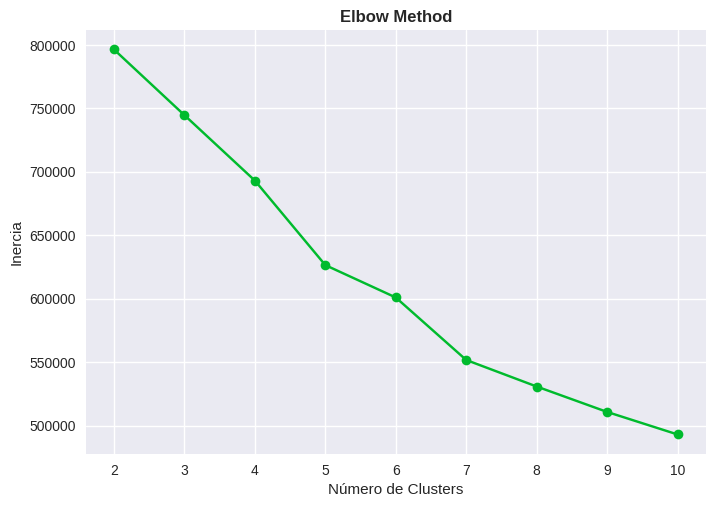

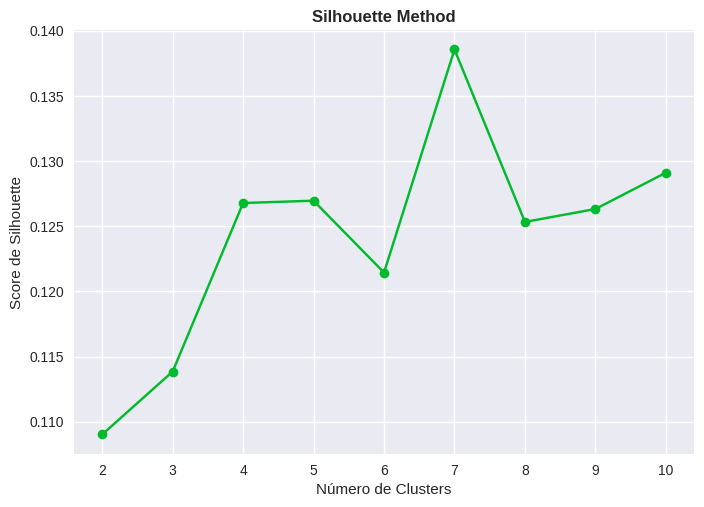

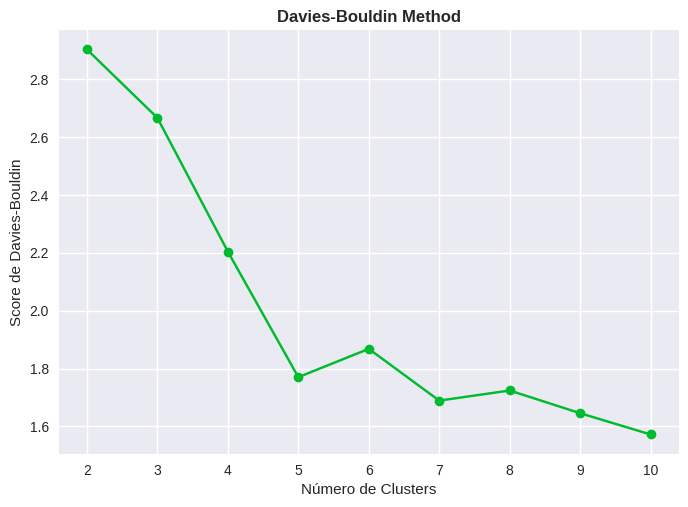

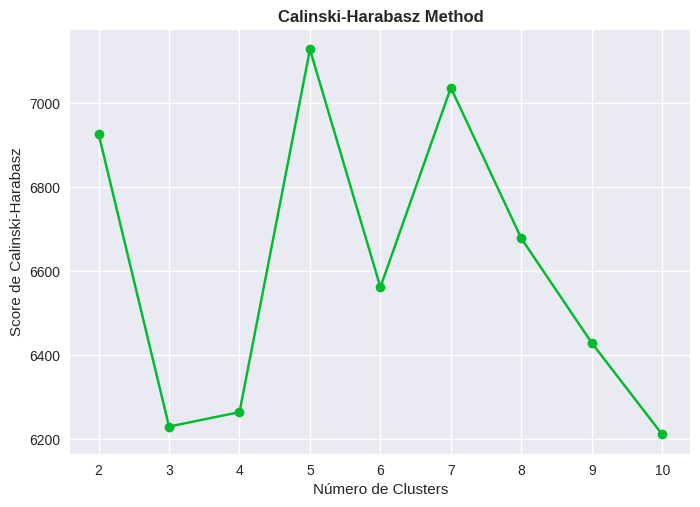

In [ ]:
def evaluate_methods(data, max_clusters=10):
    methods = [
        ("Elbow Method", 'inertia_', 'Inercia'),
        ("Silhouette Method", silhouette_score, 'Score de Silhouette'),
        ("Davies-Bouldin Method", davies_bouldin_score, 'Score de Davies-Bouldin'),
        ("Calinski-Harabasz Method", calinski_harabasz_score, 'Score de Calinski-Harabasz')
    ]

    for name, method, ylabel in methods:
        scores = []
        for k in range(2, max_clusters + 1):
            if name == "Elbow Method":
                model = KMeans(n_clusters=k, random_state=42)
                model.fit(data)
                scores.append(model.inertia_)
            else:
                labels = KMeans(n_clusters=k, random_state=42).fit_predict(data)
                scores.append(method(data, labels))

        plt.plot(range(2, max_clusters + 1), scores, marker='o')
        plt.title(name)
        plt.xlabel('Número de Clusters')
        plt.ylabel(ylabel)
        plt.show()

evaluate_methods(data_scaled)

A partir de los métodos de optimización, se llega a la conclusión de que el mejor valor es 7 clusters.

🤖 Creo y entreno al modelo usando PCA para observar mejor la conformación de los clusters:

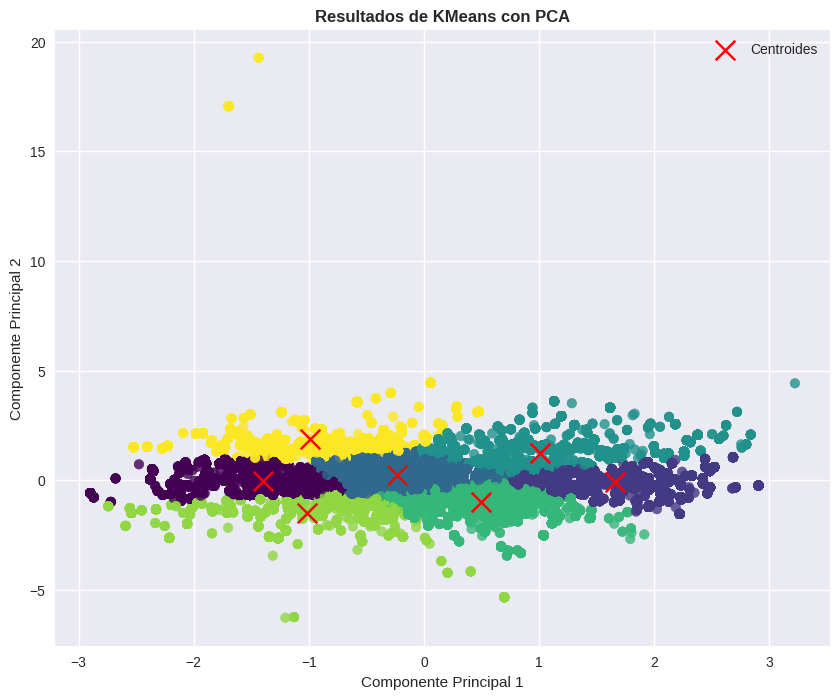

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

kmeans = KMeans(n_clusters=7, max_iter=5000, n_init=20, random_state=42).fit(X_pca)
labels = kmeans.labels_

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, color='red', label='Centroides')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados de KMeans con PCA')
plt.legend()
plt.show()

# **Mejora de modelos**

## 📈 **Modelo de regresión**

En regresión, **Random Forest** fue el modelo que dio mejores resultados, por lo que se intentará mejorarlo a través del análisis de importancia de las variables.

🏆 Importancia de las variables:

In [ ]:
best_rf_model = grid_search_rf.best_estimator_
importancias_variables = best_rf_model.feature_importances_
nombres_variables = X_train.columns

importancias_df = pd.DataFrame({'Variable': nombres_variables, 'Importancia': importancias_variables})
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)
print(importancias_df)

          Variable  Importancia
5      speechiness     0.161111
9            tempo     0.145355
0     danceability     0.112121
10     duration_ms     0.101430
8          valence     0.095840
3         loudness     0.091824
1           energy     0.091663
6     acousticness     0.084158
7         liveness     0.076697
2              key     0.030973
4             mode     0.005880
11  time_signature     0.002947


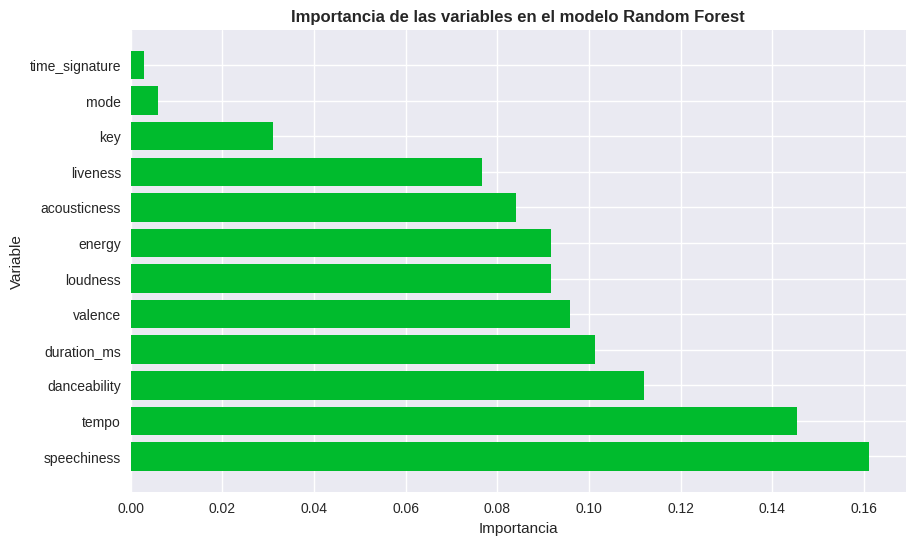

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(importancias_df['Variable'], importancias_df['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las variables en el modelo Random Forest')
plt.show()

🛠️ Mantengo únicamente las variables con mayor importancia:

In [ ]:
X = df[['speechiness','tempo', 'danceability', 'duration_ms']]
y = df['streams']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

🤖 Creo y entreno nuevamente al modelo optimizando sus parámetros con Halving search:

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

rf_best_params = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

params_rf_halving = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 25],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

halving_grid_search_rf = HalvingGridSearchCV(rf_best_params, params_rf_halving, cv=kfold, scoring='neg_mean_squared_error', factor=2, random_state=42)
halving_grid_search_rf.fit(X_train, y_train)

print("Mejores parámetros:", halving_grid_search_rf.best_params_)
print("Rendimiento en conjunto de prueba:", halving_grid_search_rf.score(X_test, y_test))

Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}
Rendimiento en conjunto de prueba: -65832925826.62087


💾 Guardar el modelo:

In [ ]:
with open('RandomForestRegressorV2.pkl', 'wb') as file:
    pickle.dump(halving_grid_search_rf, file)

💾 Cargar modelo guardado:

In [ ]:
with open('/content/RandomForestRegressorV2.pkl', 'rb') as file:
    halving_grid_search_rf = pickle.load(file)

🧠 Predicciones en el conjunto de entrenamiento:


In [ ]:
y_train_pred = halving_grid_search_rf.predict(X_train)

🔬 Métricas de evaluación:

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Mean absolute percentage error (MAPE):', metrics.mean_absolute_percentage_error(y_train, y_train_pred))
print('R²:', r2_score(y_train, y_train_pred))

Mean Absolute Error (MAE): 155722.4588759169
Mean Squared Error (MSE): 61951111535.8199
Root Mean Squared Error (RMSE): 248899.80220124705
Mean absolute percentage error (MAPE): 0.289473020394979
R²: 0.477344745295717


In [ ]:
r2_estandar = r2_score(y_train, y_train_pred)

n_observaciones = X_test.shape[0]
n_predictores = X_test.shape[1]

r2_ajustado = 1 - ((1 - r2_estandar) * (n_observaciones - 1) / (n_observaciones - n_predictores - 1))
print("R² ajustado:", r2_ajustado)

R² ajustado: 0.47724885844442055


🧠 Predicciones en el conjunto de prueba:

In [ ]:
y_test_pred = halving_grid_search_rf.predict(X_test)

🔬 Métricas de evaluación:

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('R²:', r2_score(y_test, y_test_pred))

Mean Absolute Error (MAE): 158041.23455122922
Mean Squared Error (MSE): 65832925826.62087
Root Mean Squared Error (RMSE): 256579.2778589512
Mean absolute percentage error (MAPE): 0.2957550040691288
R²: 0.462919151002693


In [ ]:
r2_estandar = r2_score(y_test, y_test_pred)

n_observaciones = X_test.shape[0]
n_predictores = X_test.shape[1]

r2_ajustado = 1 - ((1 - r2_estandar) * (n_observaciones - 1) / (n_observaciones - n_predictores - 1))
print("R² ajustado:", r2_ajustado)

R² ajustado: 0.462820617617563


Si bien los resultados obtenidos no lograron mejorar al modelo original, su tiempo de entrenamiento fue menor alcanzando un rendimiento bastante similar.

## 🧮 **Modelo de clasificación**

En clasificación, **Decision Tree** fue el modelo que dio mejores resultados, por lo que se intentará mejorarlo a través del balanceo de clases.

🔗 Aplico la técnica SMOTE + Tomek Links para balancear las clases:

In [ ]:
pip install -U imbalanced-learn

In [ ]:
from imblearn.combine import SMOTETomek
smotetomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train, y_train)

⚖️ Analizo nuevamente el balanceo de clases:

In [ ]:
values_counts_y_train = np.asarray(np.unique(y_train_resampled, return_counts=True))
values_counts_y_train

array([['ÉXITO ALTO', 'ÉXITO BAJO', 'ÉXITO MODERADO'],
       [25453, 25439, 25458]], dtype=object)

🤖 Entreno al modelo usando sus mejores parámetros obtenidos anteriormente:



In [ ]:
smote_tomek_dt = DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=1, min_samples_split=5, random_state=42)
smote_tomek_dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_split=5,
                       random_state=42)

🧠 Predicciones en el conjunto de entrenamiento:


In [ ]:
y_train_pred = smote_tomek_dt.predict(X_train)

🔬 Métricas de evaluación:

In [ ]:
classification_test_report = classification_report(y_train, y_train_pred)
print(classification_test_report)

                precision    recall  f1-score   support

    ÉXITO ALTO       0.53      0.80      0.64     12761
    ÉXITO BAJO       0.61      0.66      0.64     12645
ÉXITO MODERADO       0.76      0.53      0.63     25478

      accuracy                           0.63     50884
     macro avg       0.63      0.67      0.63     50884
  weighted avg       0.67      0.63      0.63     50884



🧠 Predicciones en el conjunto de prueba:

In [ ]:
y_test_pred = smote_tomek_dt.predict(X_test)

🔬 Métricas de evaluación:

In [ ]:
classification_test_report = classification_report(y_test, y_test_pred)
print(classification_test_report)

                precision    recall  f1-score   support

    ÉXITO ALTO       0.51      0.77      0.61      5412
    ÉXITO BAJO       0.58      0.63      0.61      5528
ÉXITO MODERADO       0.73      0.51      0.60     10868

      accuracy                           0.61     21808
     macro avg       0.61      0.64      0.61     21808
  weighted avg       0.64      0.61      0.60     21808



Si bien los resultados obtenidos no lograron mejorar al modelo original, su tiempo de entrenamiento fue menor alcanzando un rendimiento bastante similar.

## 🔗 **Modelos de ensamble**

### XGBoost - Regresión

📚 Instalo la librería necesaria:

In [ ]:
pip install xgboost

🤖 Creo y entreno al modelo optimizando sus hiperparámetros:

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

params_xgb = {
    'learning_rate': [0.001, 0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [1.0, 1.5, 2.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0, 0.1, 0.2, 0.3],
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_xgb = RandomizedSearchCV(xgb_model, params_xgb, cv=kfold, scoring='neg_root_mean_squared_error', n_iter=20, random_state=42)
random_search_xgb.fit(X_train, y_train)

print("Mejores parámetros:", random_search_xgb.best_params_)
print("Rendimiento en conjunto de prueba:", random_search_xgb.score(X_test, y_test))

Mejores parámetros: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.9}
Rendimiento en conjunto de prueba: -256573.09001336704


Se uso Random Search para poder buscar mayores posibilidades de parámetros de forma eficiente, ajustando estos de acuerdo a los resultados que arrojaba cada ejección. Se obtuvo un rendimiento similar al modelo Random Forest con grid search.

🧠 Predicciones en el conjunto de entrenamiento:

In [ ]:
y_train_pred = random_search_xgb.predict(X_train)

🔬 Métricas de evaluación:

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Mean absolute percentage error (MAPE):', metrics.mean_absolute_percentage_error(y_train, y_train_pred))
print('R²:', r2_score(y_train, y_train_pred))

Mean Absolute Error (MAE): 154886.9318314696
Mean Squared Error (MSE): 61668779061.715355
Root Mean Squared Error (RMSE): 248331.99363294966
Mean absolute percentage error (MAPE): 0.28725587670413644
R²: 0.47972666464318636


In [ ]:
r2_estandar = r2_score(y_train, y_train_pred)

n_observaciones = X_test.shape[0]
n_predictores = X_test.shape[1]

r2_ajustado = 1 - ((1 - r2_estandar) * (n_observaciones - 1) / (n_observaciones - n_predictores - 1))
print("R² ajustado:", r2_ajustado)

R² ajustado: 0.4794402099506293


🧠 Predicciones en el conjunto de prueba:

In [ ]:
y_test_pred = random_search_xgb.predict(X_test)

🔬 Métricas de evaluación:

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('R²:', r2_score(y_test, y_test_pred))

Mean Absolute Error (MAE): 158165.47082707606
Mean Squared Error (MSE): 65829750519.00734
Root Mean Squared Error (RMSE): 256573.09001336704
Mean absolute percentage error (MAPE): 0.2957477028600134
R²: 0.46294505592621715


In [ ]:
r2_estandar = r2_score(y_test, y_test_pred)

n_observaciones = X_test.shape[0]
n_predictores = X_test.shape[1]

r2_ajustado = 1 - ((1 - r2_estandar) * (n_observaciones - 1) / (n_observaciones - n_predictores - 1))
print("R² ajustado:", r2_ajustado)

R² ajustado: 0.46264936153168246


### LightGBM - Clasificación

🤖 Creo y entreno al modelo optimizando sus hiperparámetros:

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=3, random_state=42)

params_lgb = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 7, 9],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_samples': [20, 40, 60],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
}

S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search_lgb = RandomizedSearchCV(lgb_model, params_lgb, cv=S_kfold, scoring='f1_weighted', n_iter=20, random_state=42)
random_search_lgb.fit(X_train, y_train)

In [ ]:
print("Mejores parámetros:", random_search_lgb.best_params_)
print("Rendimiento en conjunto de prueba:", random_search_lgb.score(X_test, y_test))

Mejores parámetros: {'subsample': 0.8, 'reg_lambda': 0.2, 'reg_alpha': 0.2, 'num_leaves': 100, 'n_estimators': 50, 'min_child_samples': 60, 'max_depth': 9, 'learning_rate': 0.3, 'colsample_bytree': 0.8}
Rendimiento en conjunto de prueba: 0.6444796537404051


Se uso Random Search para poder buscar mayores posibilidades de parámetros de forma eficiente, ajustando estos de acuerdo a los resultados que arrojaba cada ejección. Mejora levemente el rendimiento en comparación con los modelos anteriores.

🧠 Predicciones en el conjunto de entrenamiento:

In [ ]:
y_train_pred = random_search_lgb.predict(X_train)

🔬 Métricas de evaluación:

In [ ]:
classification_test_report = classification_report(y_train, y_train_pred)
print(classification_test_report)

                precision    recall  f1-score   support

    ÉXITO ALTO       0.62      0.58      0.60     12761
    ÉXITO BAJO       0.74      0.50      0.60     12645
ÉXITO MODERADO       0.66      0.80      0.72     25478

      accuracy                           0.67     50884
     macro avg       0.68      0.63      0.64     50884
  weighted avg       0.67      0.67      0.66     50884



🧠 Predicciones en el conjunto de prueba:

In [ ]:
y_test_pred = random_search_lgb.predict(X_test)

🔬 Métricas de evaluación:

In [ ]:
classification_test_report = classification_report(y_test, y_test_pred)
print(classification_test_report)

                precision    recall  f1-score   support

    ÉXITO ALTO       0.60      0.56      0.58      5412
    ÉXITO BAJO       0.72      0.49      0.58      5528
ÉXITO MODERADO       0.65      0.78      0.71     10868

      accuracy                           0.65     21808
     macro avg       0.66      0.61      0.62     21808
  weighted avg       0.66      0.65      0.64     21808

